

#  Assignment 1
You are given $n$ documents (labels $\in \{-1,+1\}$), each consisting of $n_i$ words from some finite vocabulary $\mathsf{V=\{v_1,v_2,\dots,v_d\}}$ with size $d$.
We represent document $i$ by a vector 
$$
    \mathsf{\mathbf{x_i} = \begin{pmatrix} \mathsf{x_{i1}, x_{i2},\dots,x_{id},1 }\end{pmatrix}}
$$ where $x_{ij}=$ number of times that word $v_j$ appears in document $i$.
Now let matrix $X$ of size $n$ by $d+1$ where its $i$-th row is equal to $\mathbf{x_i}$; i.e.
$$
    \mathsf{X = \begin{pmatrix} \mathsf{x_{ij}} \end{pmatrix}_{i\in[n],j\in[d+1]}}
$$
also let vector $\mathbf{y} \in \{-1,+1\}^n$ be
$$
    \mathbf{y}=\begin{pmatrix} \mathsf{y_1 \\
                                   y_2 \\
                                   \dots \\
                                   y_n}
                                   \end{pmatrix}
$$
wher $y_i$ is the label of document $i$.
### Buidling $X$ and $\mathbf{y}$
You are given two text files
1. `train.txt`: training set (labeled documents)
2. `test.txt`: test set (unlabeled documents)

in `train.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{train}}$ 
- line $2i$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{train}}$)
- line $2i+1$ contain label for document $i$    ($i=1,2,\dots,n_{\mathrm{train}}$)

in `test.txt`:
- line $1$ is the number of documents in training set $n_{\mathrm{test}}$ 
- line $i+1$ contain words in document $i$ separated by space  ($i=1,2,\dots,n_{\mathrm{test}}$)

Now let's build $X_\mathrm{train}$,$X_\mathrm{test}$, and $\mathbf{y}_{\mathrm{train}}$ as defined above using `train.txt` and `test.txt`

### IMPORTANT
- Documents are numbered as they appear in the input file
- let Vocabulary $V=(v_1,v_2,\dots,v_d)$ be **sorted** list of all distinct word in the documents of **training** set.

In [ ]:
import numpy as np

with open("train.txt","r") as file:
    files = file.readlines()

 
   
ACT1 = [(files[i][:-2]).split() for i in range(1,len(files),2)]


with open("test.txt","r") as file:
    testfile = file.readlines()

ACT2 = [(testfile[i][:-2]).split() for i in range(1,len(testfile))]

ACT3 = []
for i in range(1,len(files),2):
    ACT3.append(int(files[i+1][:-1]))
   

# (ACT1-3) using input files compute the following
docs_train = ACT1 #list of documents where each document is a list of words
docs_test = ACT2 #list of documents where each document is a list of words
labels = ACT3   #list of labels each either -1 or +1 


n_train = len(docs_train)
n_test = len(docs_test)
print(docs_train[40])
print(docs_test[40])
print(ACT1)

#CHECKS
assert((n_train+n_test)==1500)
assert(np.sum(np.array(labels))== -348)
assert(len(docs_train[1])+len(docs_test[1])==12)

In [ ]:
# (ACT4) design a function that takes list of documents (list of list of words) 
# as input and returns sorted list of distinct words 
# use built-in sort in python for sorting strings
def make_vocabulary(docs):
    # ACT4
    vocab1 = []
    for doc in docs:
        for i in range(len(doc)):
            if not doc[i] in vocab1:
                 
                vocab1.append(doc[i])
     
    vocab1.sort()      
    return vocab1    
   
vocab = make_vocabulary(docs_train)
d = len(vocab)  
w2i = {vocab[i]:i for i in range(len(vocab))} # maps words in dictionary to corresponding index
print(vocab)
print((w2i))

#CHECKS
assert(vocab[2]=="LnGi")
assert(vocab == sorted(vocab))

In [ ]:
# (ACT5) design a function that takes 
# (1) docs: list of documents (i.e. list of list of words)
# (2) w2i: a dictionary that maps words to index
# output numpy matrix X as described above with shape of (n,d+1) -- where d is size of vocabulary
# (DO NOT forget last column of X which is all 1)

def make_matrix(docs, w2i):
    # ACT5
    n = len(docs)
    d_1 = len(w2i)
    X = np.zeros((n, d_1))
    column_1 = np.ones((n, 1))
    X = np.hstack((X, column_1))
    for i in range(n):
        freq = []
        dic_frq = {}
        for k in docs[i]:
            if k in dic_frq:
                dic_frq[k] += 1
            else:
                dic_frq[k] = 1    
           
            val = w2i[k]
            X[i][val] = dic_frq[k]

    return X

X_train = make_matrix(docs_train,w2i)
print(np.sum(X_train))
X_test = make_matrix(docs_test,w2i)
print(np.sum(X_test))

y_train = np.array(labels)

# (ACT6-8)
print ("First 5 rows of X_train: ")
print(X_train[:5])
print ("Last 5 rows of X_test: ")
print(X_test[-5:])
print ("First 10 labels of training set:")
print (y_train[:10])

#CHECKS
assert(np.sum(X_train)==6871)
assert(np.sum(X_test)==3462)
assert(np.sum(X_test[10,:]+X_train[10,:])==11)

## Linear Predictor

Let $\mathbf{w} \in \mathbb{R}^{d+1}$, for a single document $\mathbf{x} \in \mathbb{R}^{d+1}$, our predicted label is
$$
    \mathsf{\hat{y} = \mathrm{sign}({\mathbf{w} \cdot \mathbf{y}})}
$$
where 
$$
    \displaystyle  \mathrm{sign}(\alpha) = \begin{cases} 
      +1 & \alpha \geq 0 \\
      -1 & \alpha < 0 \\
    \end{cases}
$$

Therefore, for documents matrix $X \in \mathbb{R}^{n\times(d+1)}$ we predict labels $\hat{\mathbf{y}} \in \{-1,+1\}^n$
$$
    \hat{\mathbf{y}} = \mathrm{sign}(X\mathbf{w})
$$
where $\mathrm{sign()}$ here is defined to elementwise applying the sign we defined previously.

The error of our prediction over $X$ with true labels $\mathbf{y}$, is defined to be
$$
    \mathsf{\mathrm{error}=\frac{1}{n}\sum_{i=1}^{n}\ell_{01}(y_i,\hat{y}_i)}
$$
where $\displaystyle \mathsf{ \ell_{01}(y,\hat{y})= \begin{cases} 1 & y\neq\hat{y} \\ 0 & \text{otherwise}\end{cases} }$

In [4]:
# (ACT9) Design a function that takes y (list of true labels) and y_hat (list of predicted labels)
# and computes the error
def err(y,y_hat):
    # ACT9
    error = 0
    n = len(y)
    for i in range(len(y)):
        if y[i] != y_hat[i]:
            error += 1
    return  error/n       
    

#CHECKS
assert(err([-1,+1,-1,+1],[+1,+1,+1,-1])==0.75)
assert(err([+1,+1,+1,+1],[+1,+1,+1,-1])==0.25)
assert(err([-1,-1,-1,+1],[+1,+1,+1,-1])==1)

In [5]:
# (ACT10) Design a function that takes as input
# (1) document matrix X --- numpy array shape =  (n,d+1)
# (2) vector w --- numpy array shape = (d+1,1) or (d+1,)
# and output 
# (1) predictions y_hat --- numpy array shape = (n,1)
def predict(X,w):
    # ACT10
    lst = []
    alpha = np.dot(X,w)
    for i in alpha:
        if i >= 0:
           lst.append(+1)
        else:
            lst.append(-1)                       
    return np.array((lst)) 
           
    

#CHECKS
assert(np.sum(predict(X_train,np.ones(d+1).reshape(-1,1)).reshape(-1,1))==n_train)

### Candidate list for $\mathbf{w}$
we give you a small candidates list `candids` of $\mathbf{w}$'s. We want you to find $\mathbf{w}^*$ in this list which gives you the smallest error over **training set**.

In [ ]:
# Loading candidates list candids = [w0,w1,...]
import pickle
with open('candids.pkl', 'rb') as f:
    candids = pickle.load(f)
print("size of candidates lists %d"%len(candids))
print(candids[0])

In [ ]:
# (ACT11) fill err_list with training error of each candidate w
ACT11 = []
for i in ((candids)):
    h = ((predict(X_train,i)))
    # print(h)
    e = err(np.array((labels)),h)
    ACT11.append(e)
err_list = ACT11

# (ACT12) index of w with smallest error over training set 
best_index = np.argmin(err_list)

print("Training Error of candidates:")
for i,err in enumerate(err_list):
    print(f"Candidate # %d has error %f" % (i,err))

print("Index of best predictor: %d"%best_index)
print("Best Predictor:")
print(candids[best_index])

#CHECKS
assert(np.sum(err_list)<=2.5)

In [ ]:
# Best predictor
w_best = candids[best_index]

# (ACT13) Use w_best to predict labels for X_test 
def ACT13(X_test,w_best):
    ACT13 = []
    for i in ((X_test)):
        h = ((predict(X_test,w_best)))
        ACT13.append(h)
    return ACT13    
y_test = ACT13(X_test,w_best)

# (ACT14) print first 10 labels predicted for test set
print(y_test[:11])

#CHECKS
def my_hash(y):
    p1 = 28433
    p2 = 577
    ret = 0
    for e in range(len(y)):
        ret = ((ret*p2+int(e)) % p1 + p1) % p1
    return ret
assert(my_hash(y_test) == 19262)

## Frequency of words

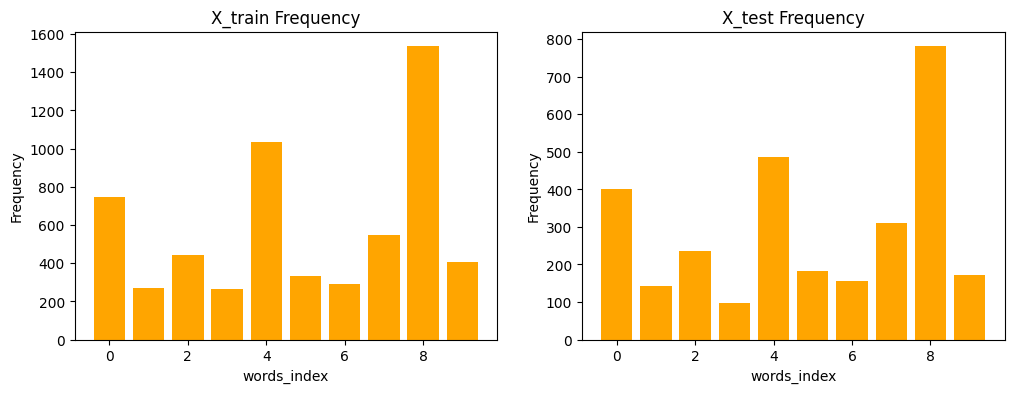

In [9]:
# (ACT15) using X_train and X_test
# plot frequency (number of times it appeared) of each word using index of words as x-axis 
# using two subplots (bar plots) one for X_train and one for X_test
# you might find plt.bar useful
import matplotlib.pyplot as plt

# ACT15


# print(words_index)


def X_train_freq(X_train,w2i):
    freq = []
    
    for i in range(len(words_index)):
        count = 0
        for j in range(len(X_train)):

            count += X_train[j][i] 
        freq.append(count)
    return freq    

def X_test_freq(X_test,w2i):
    freq = []
    
    for i in range(len(words_index)):
        count = 0
        for j in range(len(X_test)):

            count += X_test[j][i] 
        freq.append(count)
    return freq    

words_index = w2i.values()        

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

########### X_train frequency plots ##########
axs[1].bar(words_index,X_test_freq(X_test,words_index),color="orange")
axs[1].set_title("X_test Frequency")
axs[1].set_xlabel("words_index")
axs[1].set_ylabel("Frequency")
# plt.show()

######## X_test frequency plots #########
axs[0].bar(words_index,X_train_freq(X_train,words_index),color="orange")
axs[0].set_title("X_train Frequency")
axs[0].set_xlabel("words_index")
axs[0].set_ylabel("Frequency")

plt.show()
            